In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#has functions to split the data set into training set and test set
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn import metrics

pima_df = pd.read_csv("diabetes.csv")
pima_df.head(20)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Description of the data

The headings in the dataset as read from the CSV are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age and	Outcome. All the data is measured on women 21+ years of age. 

**Pregnancies:** Number of times pregnant (0 to n)

**Glucose:** Plasma glucose concentration 2 hours in an oral glucose tolerance test

**BloodPressure:** Diastolic blood pressure (mm Hg)

**SkinThickness:** Triceps skin fold thickness (mm)

**Insulin:** 2-Hour serum insulin (mu U/ml)

**BMI:** Body Mass Index

**DiabetesPedigreeFunction:** Diabetes Pedigree (Family history of diabetes)

**Age:** Age in years

**Outcome:** 1 or 0 indicating presence or absence of Type 2 Diabetes. This a categorical value. This is the value which the model we develop will predict.

We will rename the columns for ease of handling data.

In [135]:
pima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [136]:
pima_df.columns = ["Pregnancies","Glucose","BP","Skin","Insulin","BMI","Pedigree","Age","Outcome"]

The data set loaded above shows that there are many entries with Data unavailable. We have to analyse how many records in each category have valid data.

In [137]:
print("Total records "+str(pima_df['Outcome'].count()))

print("Number of records with Blood Glucose available "+str(pima_df['Outcome'][pima_df["Glucose"] > 0].count()))

print("Number of records with BloodPressure available "+str(pima_df['Outcome'][pima_df["BP"] > 0].count()))

print("Number of records with SkinThickness available "+str(pima_df['Outcome'][pima_df["Skin"] > 0].count()))

print("Number of records with Insulin available "+str(pima_df['Outcome'][pima_df["Insulin"] > 0].count()))

print("Number of records with BMI available "+str(pima_df['Outcome'][pima_df["BMI"] > 0].count()))



Total records 768
Number of records with Blood Glucose available 763
Number of records with BloodPressure available 733
Number of records with SkinThickness available 541
Number of records with Insulin available 394
Number of records with BMI available 757


We will impute the respective median for all values which are not available and 0 is non-acceptable for the values. Other than preganancy and outcome, no other values can be 0. We will replace these with the respective median values.

In [138]:
pima_df['Skin'].replace(0,np.median(pima_df['Skin']),inplace=True)
pima_df['BP'].replace(0,np.median(pima_df['BP']),inplace=True)
pima_df['BMI'].replace(0,np.median(pima_df['BMI']),inplace=True)
pima_df['Insulin'].replace(0,np.median(pima_df['Insulin']),inplace=True)
pima_df['Glucose'].replace(0,np.median(pima_df['Glucose']),inplace=True)

#as Outcome is int64 type we convert it into category type
pima_df['Outcome'] = pima_df.Outcome.astype('category')

pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BP,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
Skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


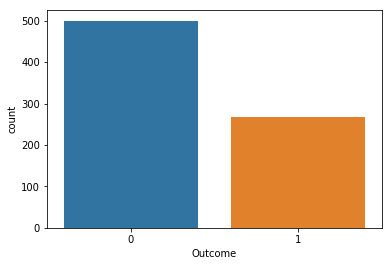

In [139]:
sns.countplot('Outcome',data=pima_df)

In [140]:
positive = len(pima_df.loc[pima_df['Outcome'] == 1])
negative = len(pima_df.loc[pima_df['Outcome'] == 0])
print("Number of positive cases: {0} ".format(positive))
print("Number of negative cases: {0}".format(negative))

Number of positive cases: 268 
Number of negative cases: 500


In [141]:
pima_feature_df = pima_df.drop(labels='Outcome', axis = 1)


In [142]:
diab_outcome = pima_df['Outcome']

In [143]:
X = np.array(pima_feature_df)
y = np.array(diab_outcome)


In [144]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state=0)

print("The size of the test data is ",len(y_test))

The size of the test data is  154


In [145]:
clf = GaussianNB()
clf.fit(X_train,y_train)
print(clf.score(X_train, y_train))


0.744299674267101


### Observation
Based on the score of the model based on training data, since it is above 60% (74.43%) we can go ahead and test the prediction based on the model.

In [146]:
print("Model Accuracy with test data : ",clf.score(X_test, y_test))
test_prediction = clf.predict(X_test)

Model Accuracy with test data :  0.7792207792207793


### Inference
From the above observation, it is evident that the accuracy of the model based on the test data is 78%

### Prediction accuracy with cross validation using KFold
We will further verify our result with KFold which provides train/test indices to split data in train/test sets. Split dataset into 5 consecutive folds. Each fold is then used once as test set while the  4 remaining folds form the training set.


In [147]:
kfold = model_selection.KFold(n_splits=5, random_state=23, shuffle=True)
cv_results = model_selection.cross_val_score(clf, X_test, y_test, cv=kfold, scoring='accuracy')
print("Mean of the cross validation test data result is ",cv_results.mean())


Mean of the cross validation test data result is  0.7726881720430108


### Inference
The result using KFold with the Gaussian Naive Bayes model returns a similar accuracy of 77.3%.

### Confusion matrix

The diabetes prediction and test can have two possible outcomes. The person can either be positive or be negative. The confusion matrix for a binary classification as in this case of diabetes outcome is a 2X2 table formed by counting of the number of the four outcomes. We usually denote them as True Positive(TP) where the the prediction was positive and the actual result was also positive, False Positive(FP), where the prediction was positive but the result was negative, True Negative(TN) where the prediction was negative and the result was also negative, and False Negative (FN) where the prediction was negative but the actual result was positive.

Some important metrics we can infer from the confusion matrix are,

**accuracy** = (True Positive + True Negative)/Total

**misclassification**  = (False Positive + False Negative)/Total

**sensitivity or recall** = True Positive / Total positive where Total positive is ( True Positive + False Negative)

**specificity** = True Negative/ Total Negative where Total negative is (True Negative + False Positive) 

In [148]:
print("Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(y_test, test_prediction, labels=[1, 0])

print(confusion_matrix)



Confusion Matrix
[[28 19]
 [15 92]]


In [149]:
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1])/len(y_test)
print("Accuracy ",accuracy)

misclassification = (confusion_matrix[1,0] + confusion_matrix[0,1])/len(y_test)
print("Misclassification ",misclassification)

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print("Sensitivity ",sensitivity)

specificity = confusion_matrix[1,1]/(confusion_matrix[1,0] + confusion_matrix[1,1])
print("Specificity ",specificity)


Accuracy  0.7792207792207793
Misclassification  0.22077922077922077
Sensitivity  0.5957446808510638
Specificity  0.8598130841121495


In [150]:
print(metrics.classification_report(y_test,test_prediction, \
                                    target_names=['Negative','Positive']))


              precision    recall  f1-score   support

    Negative       0.83      0.86      0.84       107
    Positive       0.65      0.60      0.62        47

   micro avg       0.78      0.78      0.78       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.77      0.78      0.78       154



### Inference
From the above observation from the confusion matrix and classification report, we can infer that Gaussian Naives Bayes model does predicts the outcome at about 78% accuracy based on the given data set. Let's use recursive feature elimination based on LogisticRegression model on the data set to determine the the main features in the dataset which influences the outcome and apply Naive Bayes classification on the data subset, similar to what we have done above, to see if we get improved predictions. 

In [151]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: ",fit.n_features_)
print("Selected Features: ",fit.support_)
print("Feature Ranking: ", fit.ranking_)


Num Features:  3
Selected Features:  [ True False False False False  True  True False]
Feature Ranking:  [1 2 3 5 6 1 1 4]


In [152]:
#Let's ctreate a new X with the 3 important features Pregnancies,BMI and Pedigree
X_new = np.array(pima_feature_df.drop(labels=['Glucose','BP','Skin','Insulin','Age'],axis=1))

In [153]:
X_new_train, X_new_test,y_train,y_test = train_test_split(X_new,y, test_size = 0.20, random_state=0)

clf_new = GaussianNB()
clf_new.fit(X_new_train,y_train)
print(clf_new.score(X_new_train, y_train))


0.6840390879478827


In [154]:
test_prediction_ltd_features = clf_new.predict(X_new_test)
print("Model Accuracy with test data : ",metrics.accuracy_score(y_test, test_prediction_ltd_features))

print("Confusion Matrix")

confusion_matrix_new = metrics.confusion_matrix(y_test, test_prediction_ltd_features, labels=[1, 0])

print(confusion_matrix_new)

accuracy = (confusion_matrix_new[0,0] + confusion_matrix_new[1,1])/len(y_test)
print("Accuracy ",accuracy)

misclassification = (confusion_matrix_new[1,0] + confusion_matrix_new[0,1])/len(y_test)
print("Misclassification ",misclassification)

sensitivity = confusion_matrix_new[0,0]/(confusion_matrix_new[0,0]+confusion_matrix_new[0,1])
print("Sensitivity ",sensitivity)

specificity = confusion_matrix_new[1,1]/(confusion_matrix_new[1,0] + confusion_matrix_new[1,1])
print("Specificity ",specificity)



Model Accuracy with test data :  0.7987012987012987
Confusion Matrix
[[24 23]
 [ 8 99]]
Accuracy  0.7987012987012987
Misclassification  0.2012987012987013
Sensitivity  0.5106382978723404
Specificity  0.9252336448598131


### Inference
When the outcome is based on three features, using Naive Bayes classifier, the accuracy seems to have improved to almost 80%. But the sensitivity has gone down to 51%.

### Conclusion:
Based on the two inferences, the former model considering all the features would be more effective in the production environment as the sensitivity is higher. However given the sensitivity score, though diabetes is not life-threating in initial stages, it is better to take the opinion of subject matter expert to take the model into consideration. 
